In [1]:
''' Discard all warnings in Jupyter Notebook'''
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
dftrain = pd.read_csv("Data/FINAL_CSV/train70_reduced.csv") 
dftrain_roc = dftrain
dftrain = dftrain[0:14000]
dftrain.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [4]:
dftest = pd.read_csv("Data/FINAL_CSV/test30_reduced.csv")
dftest_roc = dftest
# dftest = dftest[0:36000]
dftest.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [5]:
encoder = LabelEncoder()
dftrain['target'] = encoder.fit_transform(dftrain['target'])
encoder.classes_

array(['bruteforce', 'ddos', 'flood', 'legitimate', 'malformed',
       'slowite'], dtype=object)

In [6]:
for column in dftrain.columns:
    if dftrain[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftrain[column] = labelencoder.fit_transform(dftrain[column])

X_train = dftrain.drop("target",axis = 'columns')
y_train = dftrain["target"]

In [7]:
for column in dftest.columns:
    if dftest[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftest[column] = labelencoder.fit_transform(dftest[column])

X_test = dftest.drop("target",axis = 'columns')
y_test = dftest["target"]

In [34]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier 
start = time.time()
print("Starting Decision tree")
clf = DecisionTreeClassifier(max_depth=150, splitter="best", criterion="log_loss", random_state=12)
clf.fit(X_train,y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_dt = clf.predict(X_test)
y_pred_dt_roc = clf.predict_proba(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

Starting Decision tree
Training time: 0.049317359924316406
Test time: 0.10030579566955566


In [35]:
accuracy = clf.score(X_test, y_test)
print("Dokładność modelu Dercision three:", accuracy)
# Użyj modelu SVM, który został już wytrenowany
y_pred = clf.predict(X_test)


y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Dokładność modelu Random forest: 0.8933427334071911
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.73      0.72      0.72      4351
        ddos       0.90      0.91      0.91     39077
       flood       0.98      0.28      0.44       184
  legitimate       0.93      0.91      0.92     49639
   malformed       0.48      0.62      0.54      3278
     slowite       1.00      1.00      1.00      2761

    accuracy                           0.89     99290
   macro avg       0.84      0.74      0.75     99290
weighted avg       0.90      0.89      0.89     99290

Confusion Matrix:
[[ 3127   520     0    45   659     0]
 [  298 35438     0  3281    60     0]
 [    1    25    52    78    28     0]
 [    0  2874     1 45290  1474     0]
 [  863   363     0    20  2032     0]
 [    0     0     0     0     0  2761]]
#################################################################################################################################

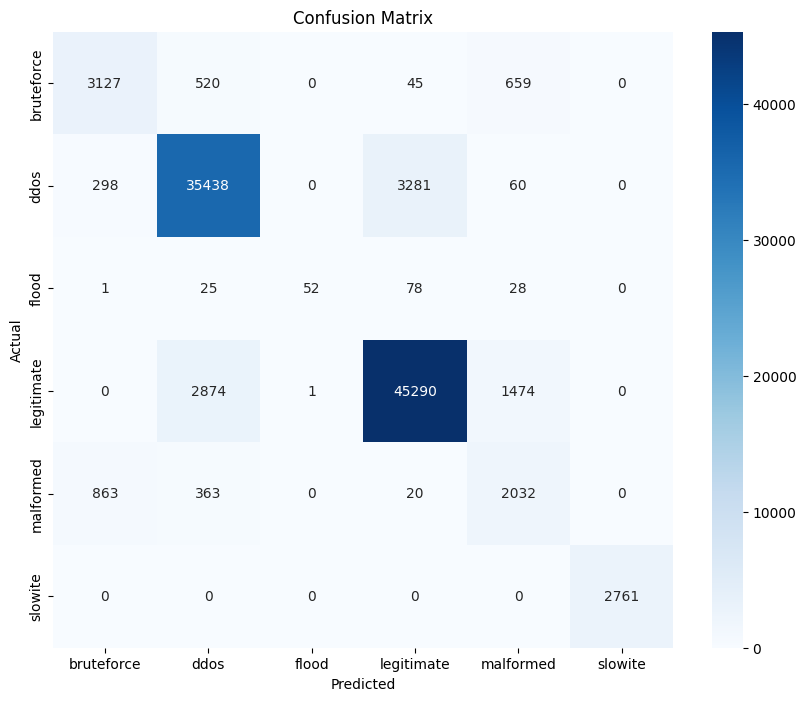

In [36]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
importances = clf.feature_importances_
indices = np.argsort(importances)

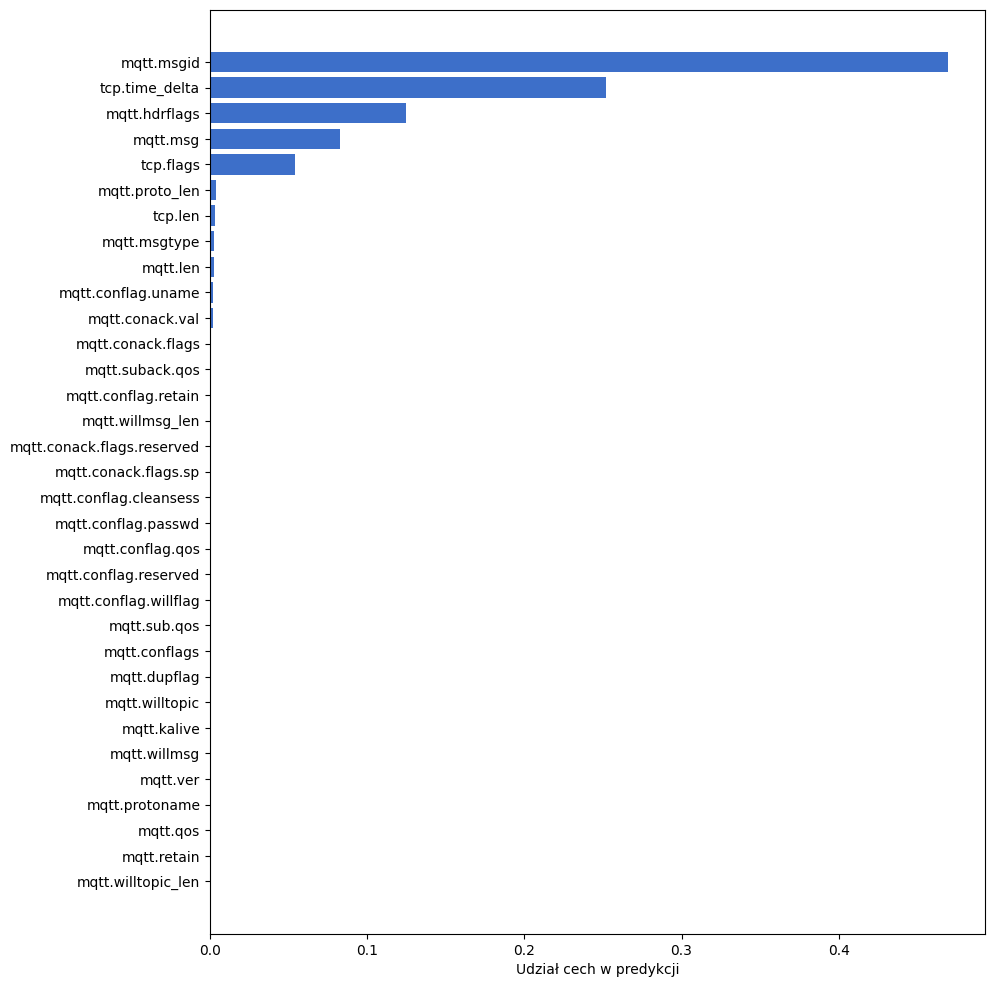

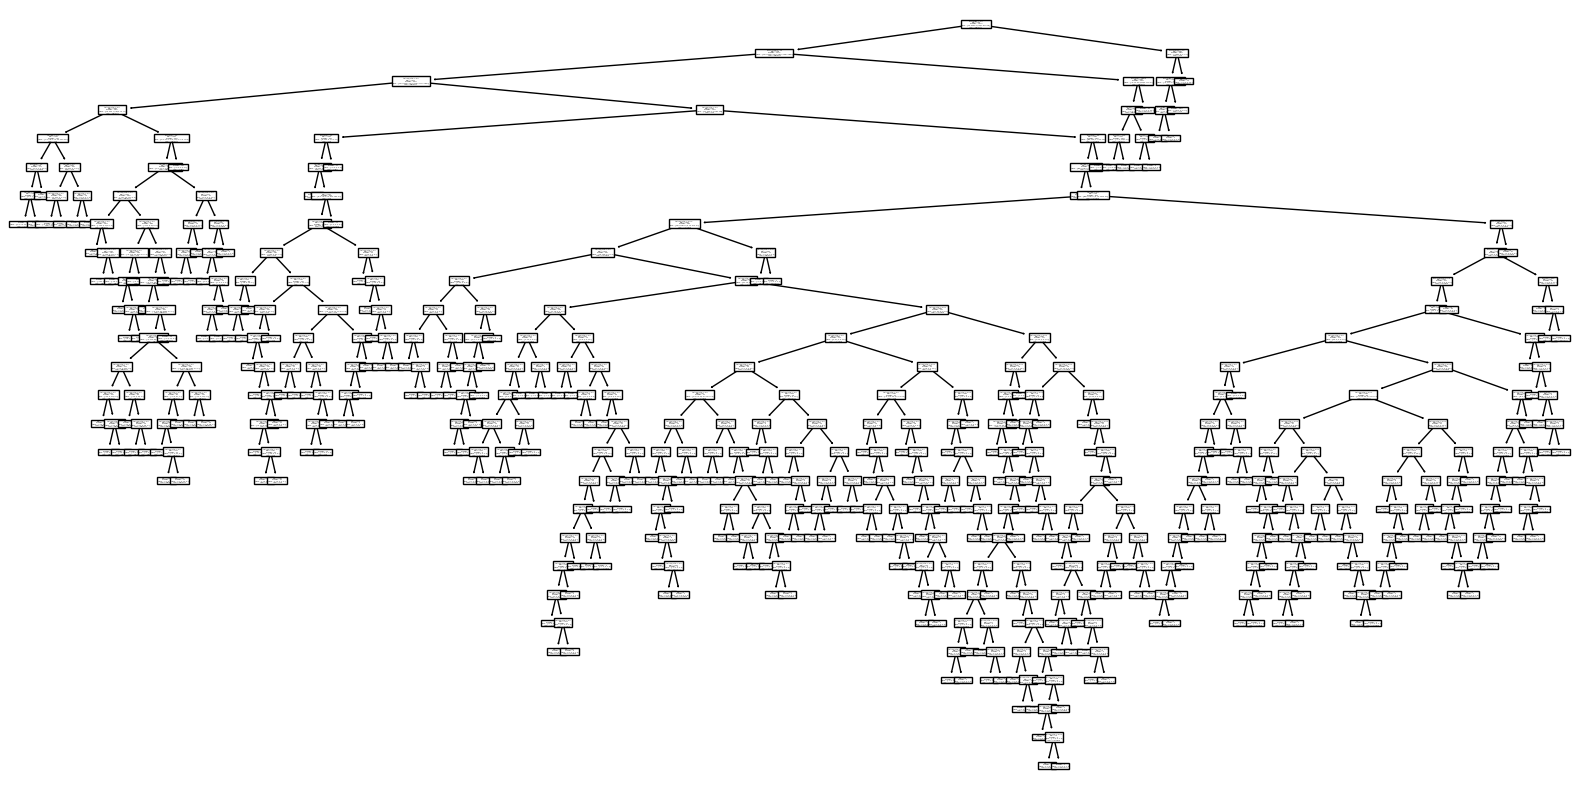

In [12]:
plt.figure(figsize=(10, 12))
# plt.title('Ważność cech')
plt.barh(range(len(indices)), importances[indices], align='center', color=(61/255,111/255,201/255))
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Udział cech w predykcji')
plt.show()

# Wizualizacja jednego z drzew w lesie
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=encoder.classes_, filled=False)
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
decision_tree = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Najlepsze parametry:", grid_search.best_params_)


clf = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
clf.fit(X_train,y_train)

accuracy = clf.score(X_test, y_test)
print("Dokładność modelu Random forest:", accuracy)
# Użyj modelu SVM, który został już wytrenowany
y_pred = clf.predict(X_test)


y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Najlepsze parametry: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 5}
Dokładność modelu Random forest: 0.9065162654849431
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.73      0.76      0.74      4351
        ddos       0.96      0.91      0.93     39077
       flood       1.00      0.27      0.43       184
  legitimate       0.93      0.94      0.93     49639
   malformed       0.39      0.60      0.47      3278
     slowite       1.00      1.00      1.00      2761

    accuracy                           0.91     99290
   macro avg       0.83      0.75      0.75     99290
weighted avg       0.92      0.91      0.91     99290

Confusion Matrix:
[[ 3302   477     0    45   527     0]
 [  308 35440     0  3281    48     0]
 [    1    21    50    72    40     0]
 [    2   642     0 46477  2518     0]
 [  940   340     0    20  1978     0]
 [    0     0     0     0     0  2761]]
#######################################

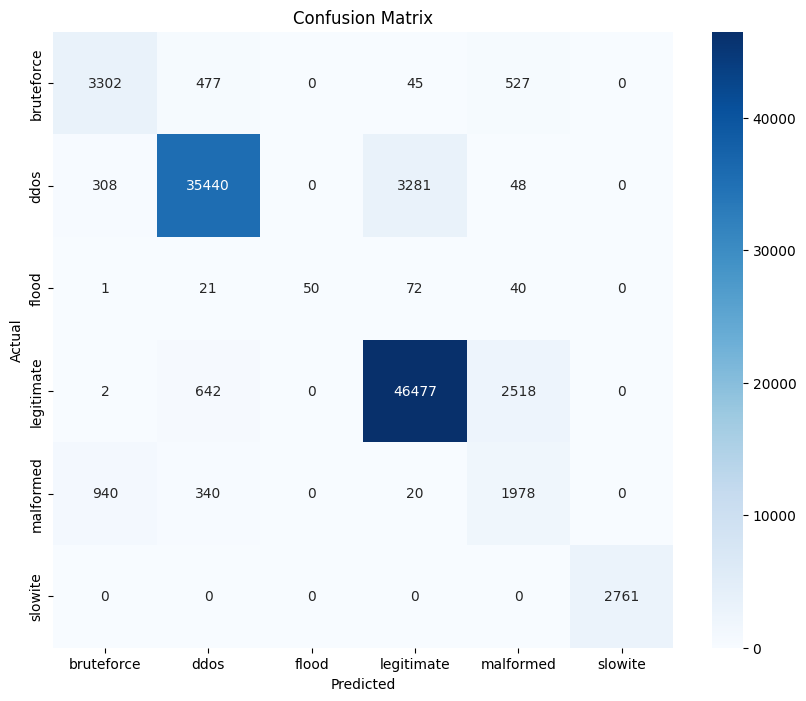

In [42]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()